In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
cc_data = pd.read_csv('creditcard.csv')

In [3]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc_data.shape

(284807, 31)

In [5]:
cc_data.size

8829017

In [6]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# distribution of legit and fraud transaction 
cc_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### This data is highly unbalanced as number of legit transactions(0) is very very greater than number of fraud transactions
##### 0 -> Normal transaction
##### 1 -> Fraud transaction

In [10]:
# separating the data for analysis
legit = cc_data[cc_data.Class==0]
fraud = cc_data[cc_data.Class==1]

In [11]:
print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


In [12]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [13]:
# Statistical measures of 'Amount' in legit
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# compare the values for both transactions
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under Sampling
##### Build a sample dataset(because origional dataset is highly unbalanced) containing similar distribution of both transactions

In [16]:
legit_sample = legit.sample(n=500)

#### Concatinating two dataframes

In [17]:
new_ds = pd.concat([legit_sample, fraud], axis=0) # concatinating df row wise(axis=0)

In [18]:
new_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45593,42414.0,-0.861564,0.923234,1.248265,1.121301,-0.111793,0.040732,0.393772,0.339263,-0.817820,...,0.262751,0.847862,0.068465,0.222687,-0.316256,-0.246744,-0.201827,-0.176900,41.90,0
39094,39692.0,1.156355,0.237251,0.379550,1.070073,-0.374101,-0.773297,0.110140,-0.078839,-0.222503,...,0.096879,0.231755,-0.094932,0.523407,0.608428,-0.358034,0.004308,0.013851,19.95,0
120227,75753.0,-0.658076,1.161863,1.251660,-0.105846,0.048063,-0.338729,0.469971,0.257695,-0.354827,...,-0.211856,-0.515521,0.043653,0.146047,-0.268883,0.078964,0.360214,0.143992,2.68,0
188989,128222.0,1.865649,-1.568799,0.023740,-0.437398,-0.920309,2.092637,-1.867884,0.773367,0.775320,...,-0.338362,-0.137120,0.345063,-1.639367,-0.796352,0.640136,0.070653,-0.058241,38.00,0
122059,76420.0,-0.460015,0.948832,1.451867,-0.214452,0.186786,-0.412360,0.567115,0.103964,-0.632560,...,-0.194546,-0.543041,-0.068644,-0.015480,-0.178184,0.074026,0.259940,0.108315,2.28,0


In [19]:
new_ds['Class'].value_counts()

0    500
1    492
Name: Class, dtype: int64

In [20]:
new_ds.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98430.070000,0.058411,0.056013,0.003767,-0.014923,-0.027478,-0.099111,-0.010668,0.025130,0.025232,...,-0.020202,0.033742,0.001750,-0.011495,0.005934,-0.020198,0.016738,0.000740,-0.005475,80.639080
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Splitting the data into features and target

In [21]:
X = new_ds.drop(columns=['Class'], axis=1)
Y = new_ds['Class']

In [22]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
45593,42414.0,-0.861564,0.923234,1.248265,1.121301,-0.111793,0.040732,0.393772,0.339263,-0.817820,...,-0.125375,0.262751,0.847862,0.068465,0.222687,-0.316256,-0.246744,-0.201827,-0.176900,41.90
39094,39692.0,1.156355,0.237251,0.379550,1.070073,-0.374101,-0.773297,0.110140,-0.078839,-0.222503,...,-0.138056,0.096879,0.231755,-0.094932,0.523407,0.608428,-0.358034,0.004308,0.013851,19.95
120227,75753.0,-0.658076,1.161863,1.251660,-0.105846,0.048063,-0.338729,0.469971,0.257695,-0.354827,...,0.156392,-0.211856,-0.515521,0.043653,0.146047,-0.268883,0.078964,0.360214,0.143992,2.68
188989,128222.0,1.865649,-1.568799,0.023740,-0.437398,-0.920309,2.092637,-1.867884,0.773367,0.775320,...,-0.656964,-0.338362,-0.137120,0.345063,-1.639367,-0.796352,0.640136,0.070653,-0.058241,38.00
122059,76420.0,-0.460015,0.948832,1.451867,-0.214452,0.186786,-0.412360,0.567115,0.103964,-0.632560,...,0.129432,-0.194546,-0.543041,-0.068644,-0.015480,-0.178184,0.074026,0.259940,0.108315,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
correalation = X.corr()

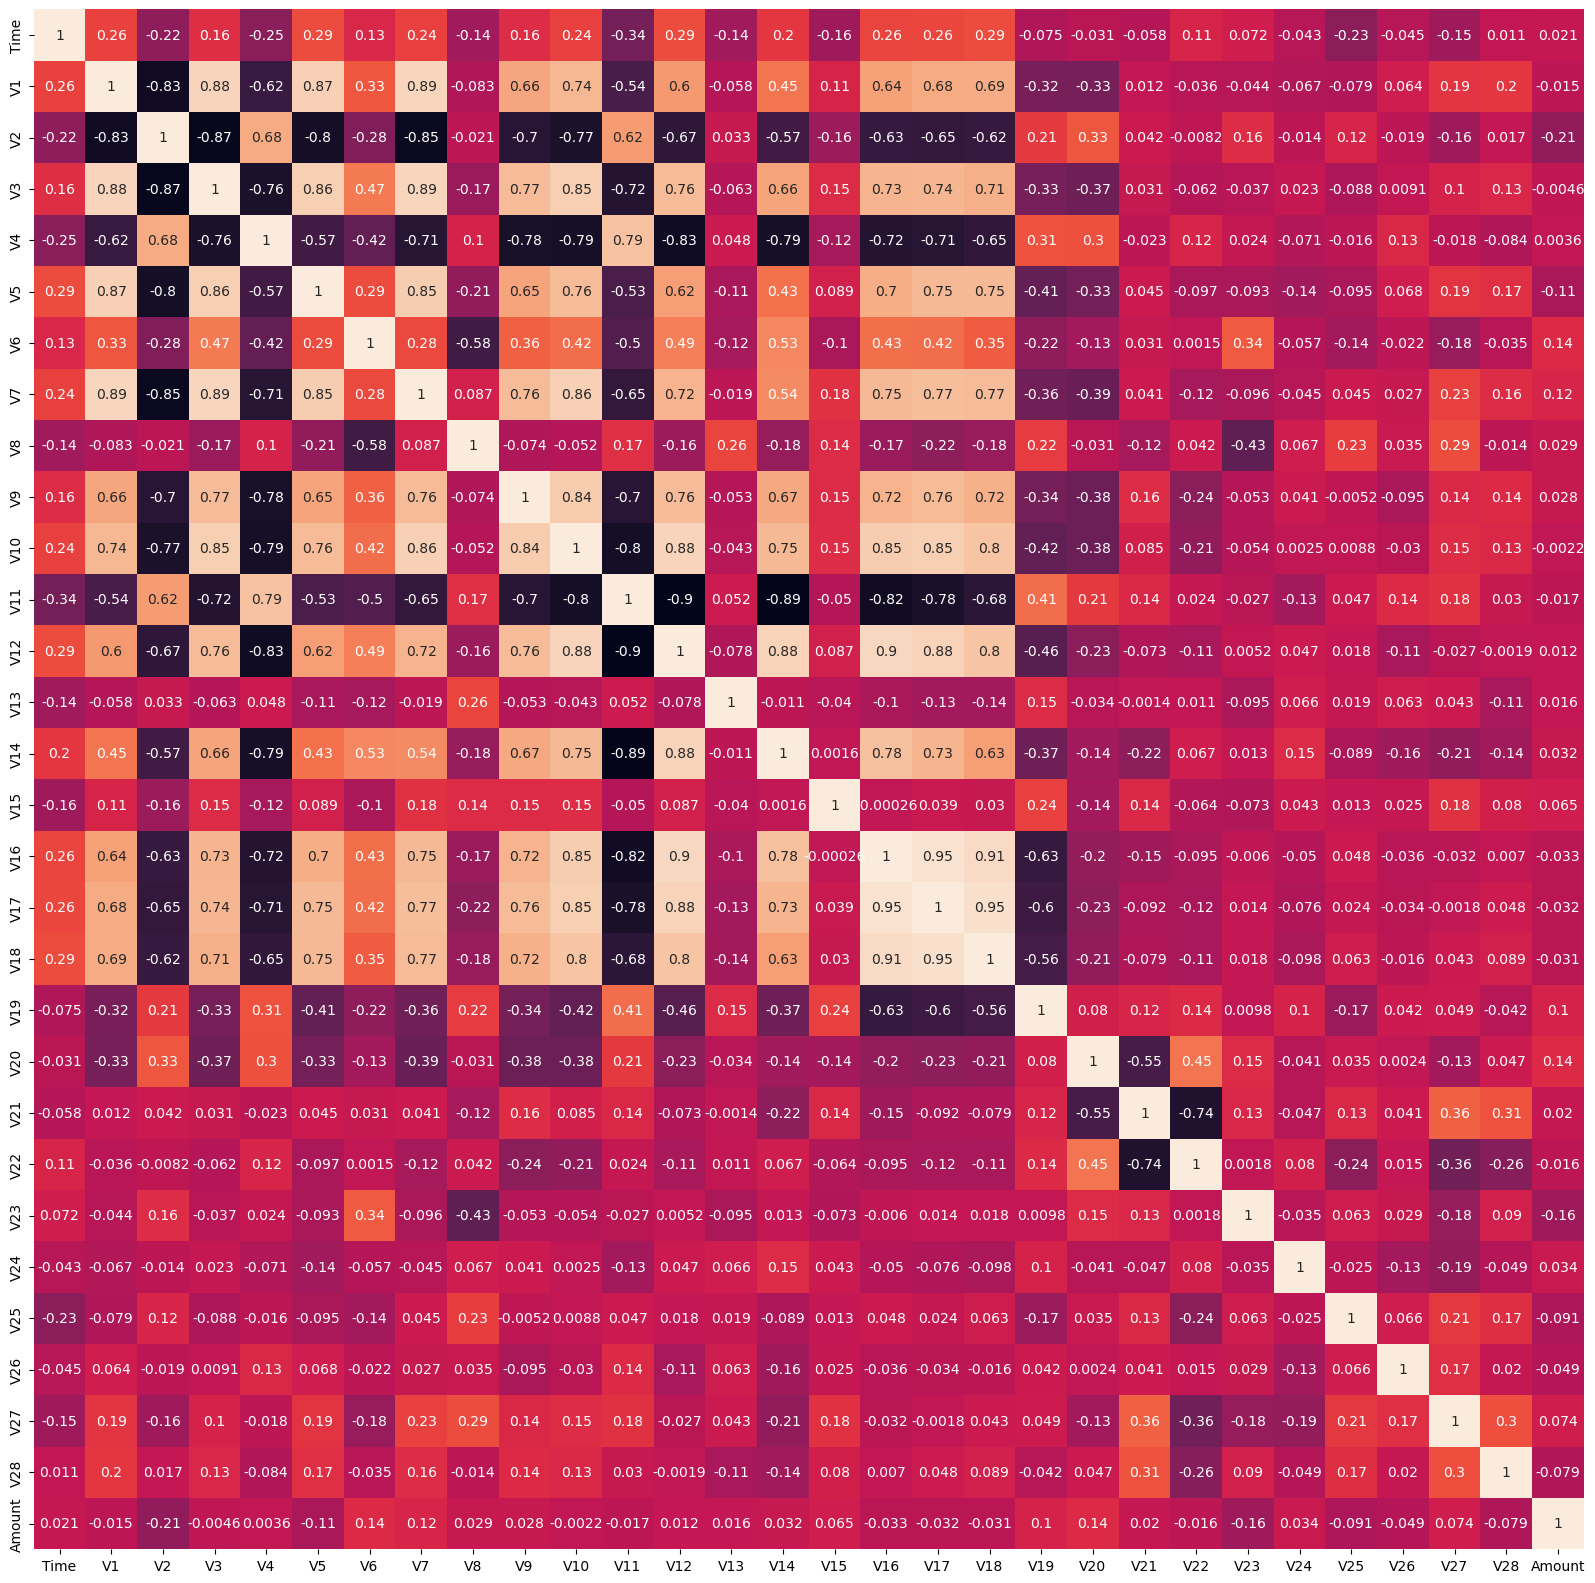

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(correalation, annot=True, cbar=False)
plt.show()

In [25]:
#X = X.drop(columns=['V1','V5','V16','V18'])

In [26]:
Y

45593     0
39094     0
120227    0
188989    0
122059    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 992, dtype: int64

### Splitting the data training and testing data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(992, 30) (793, 30) (199, 30)


### Model training
#### 1.Using Logistic Regression

In [29]:
model_LR = LogisticRegression()

In [30]:
model_LR.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy on training data
X_train_prediction = model_LR.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data :', training_data_accuracy)

training_data_precision = precision_score(Y_train, X_train_prediction)
print('Precision on training data :', training_data_precision)

Accuracy on training data : 0.9281210592686002
Precision on training data : 0.9590163934426229


In [32]:
# accuracy on testing data
X_test_prediction = model_LR.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on training data :', test_data_accuracy)

test_data_precision = precision_score(Y_test, X_test_prediction)
print('Precision on training data :', test_data_precision)

Accuracy on training data : 0.8994974874371859
Precision on training data : 0.9438202247191011


### Making a predictive system

In [33]:
input = (406,-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0)

# converting input data into numpy array as arrays are fast
input_array = np.asarray(input)

# reshaping the input data as we are predicting for 1 instance
reshaped_input = input_array.reshape(1,-1)

prediction = model_LR.predict(reshaped_input)
print(prediction)

if(prediction[0]==0):
    print('Legit transaction')
else:
    print('Fraud transaction')


[1]
Fraud transaction
